In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import os
import sys
from pathlib import Path
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

from scipy.stats import boxcox

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

ERA_DATA_PATH = str(HOME / 'system_tests/data/ERA5')

from dsrnngan.data import  get_ifs_filepath, all_ifs_fields

## Notes

Cumulative fields: tp
tisr
cp

Fields to use conservative interpolation: tp, tclw, cape, tisr, tcwv, cp


['2t', 'cape', 'cin', 'cp', 'r200', 'r700', 'r950', 'sp', 't200', 't700', 'tclw', 'tcwv', 'tisr', 'tp', 'u200', 'u700', 'v200', 'v700', 'w200', 'w500', 'w700']
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
2t, t2m: 2 metre temperature
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cape, cape: Convective available potential energy
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cin, cin: Convective inhibition
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
cp, cp: Convective precipitation
     cp  appears to be a cumulative field
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r200, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r700, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
r950, r: Relative humidity
********
Frozen({'longitude': 265, 'latitude': 280, 'time': 73})
sp, sp: Surface pressure
********
Frozen({'longitude'

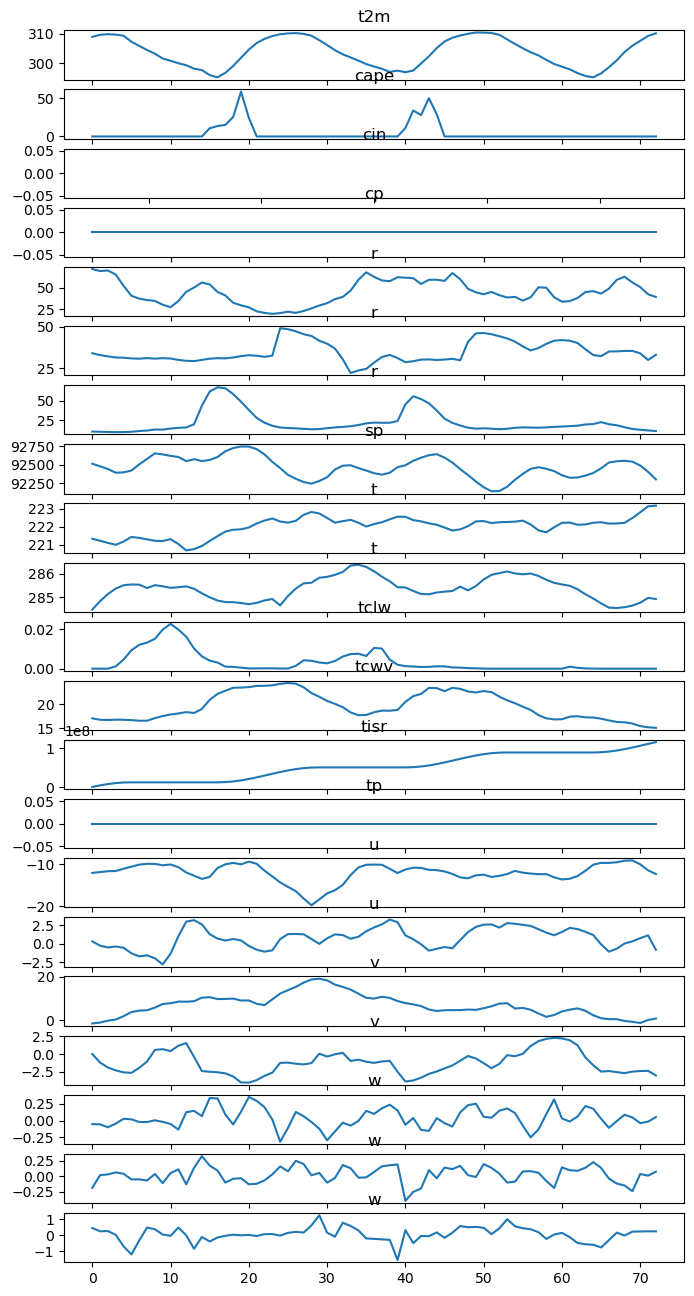

In [9]:
import re
from datetime import datetime

vars = all_ifs_fields
print(vars)

fig, ax = plt.subplots(len(vars), 1, figsize = (8, 16))
neg_fraction_dict = {}
nan_fraction_dict = {}
for n, var in enumerate(vars):

    print('*'*8)
    fp = get_ifs_filepath(field=var, 
                          fcst_dir='/bp1/geog-tropical/users/uz22147/IFS_east_africa',
                          loaddate=datetime(2016, 7, 2), loadtime='12')
    ds = xr.open_dataset(fp)
    var_name = list(ds.data_vars)[0]
    
    print(ds.dims)
    print(f"{var}, {var_name}: {ds[var_name].attrs['long_name']}")
    
    nan_fraction = np.isnan(ds[var_name].values).sum() /  len( ds[var_name].values.flatten())
    nan_fraction_dict[var] = nan_fraction
    
    negative_fraction = len([item for item in ds[var_name].values.flatten() if item < 0]) / len( ds[var_name].values.flatten())
    neg_fraction_dict[var] = negative_fraction
    
    sample = ds.isel(latitude=0).isel(longitude=0)

    ax[n].plot(sample[var_name].values)
    ax[n].set_title(var_name)
    
    if list(sample[var_name].values) == sorted(sample[var_name].values):
        print('    ',var, ' appears to be a cumulative field')


In [12]:
# load cin
fp = os.path.join('/user/work/uz22147', 'cin_HRES_1h_EAfrica_2016-07-02_12h.nc')

ds = xr.load_dataset(fp)

In [47]:
# Load and plot IFs data
from datetime import datetime
year = 2018
month = 7
day = 29
var = 'tp'
fp = get_ifs_filepath(var, loaddate=datetime(year, month, day), loadtime=12)
ds = xr.load_dataset(fp)
ds[var] = ds[var] * 1000
ds[var].isel(time=6).plot()

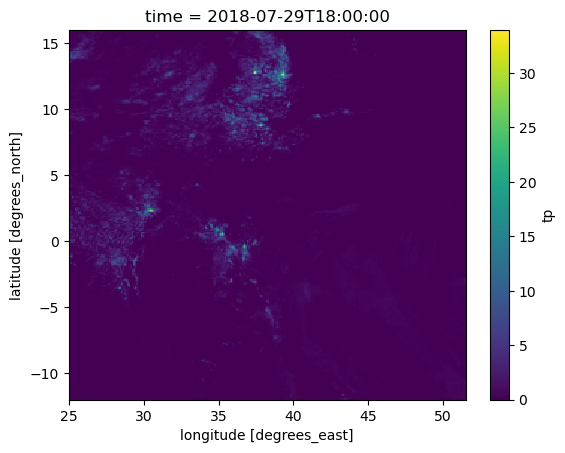

In [48]:
fp = get_ifs_filepath('tp', loaddate=datetime(year, month, day), loadtime=12)
ds = xr.load_dataset(fp)
ds['tp'] = ds['tp'] * 1000
ds['tp'].isel(time=6).plot()

2018-07-29 19:00:00
2018-07-29 18:00:00
12
12.25193403661251
2018-07-29 19:00:00
2018-07-29 18:00:00
12
1.1222792654527165


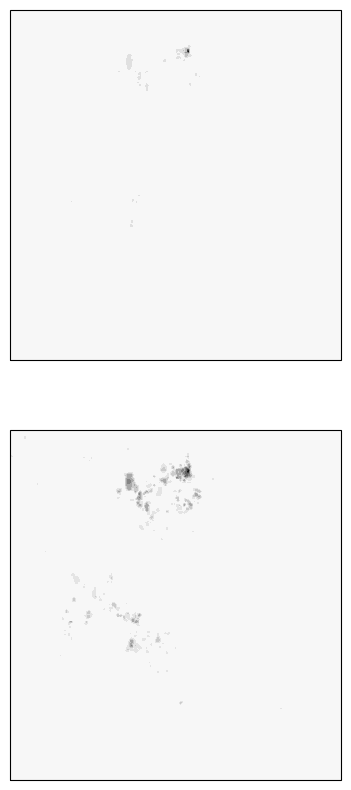

In [50]:
from dsrnngan.data import load_ifs_raw, load_ifs
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10), 
                        subplot_kw={'projection': ccrs.PlateCarree()})

ds = load_ifs_raw('tp', year, month, day, 18)
ds['tp'] = ds['tp']*1000
print(ds['tp'].values.max())
im = axs[0].contourf(ds.longitude.values, ds.latitude.values , ds['tp'].values, transform=ccrs.PlateCarree(),
                        cmap='Greys')

data = load_ifs('tp', datetime(year, month, day), 18, log_precip=True)
print(data.max())
im = axs[1].contourf(ds.longitude.values, ds.latitude.values , data, transform=ccrs.PlateCarree(),
                        cmap='Greys')

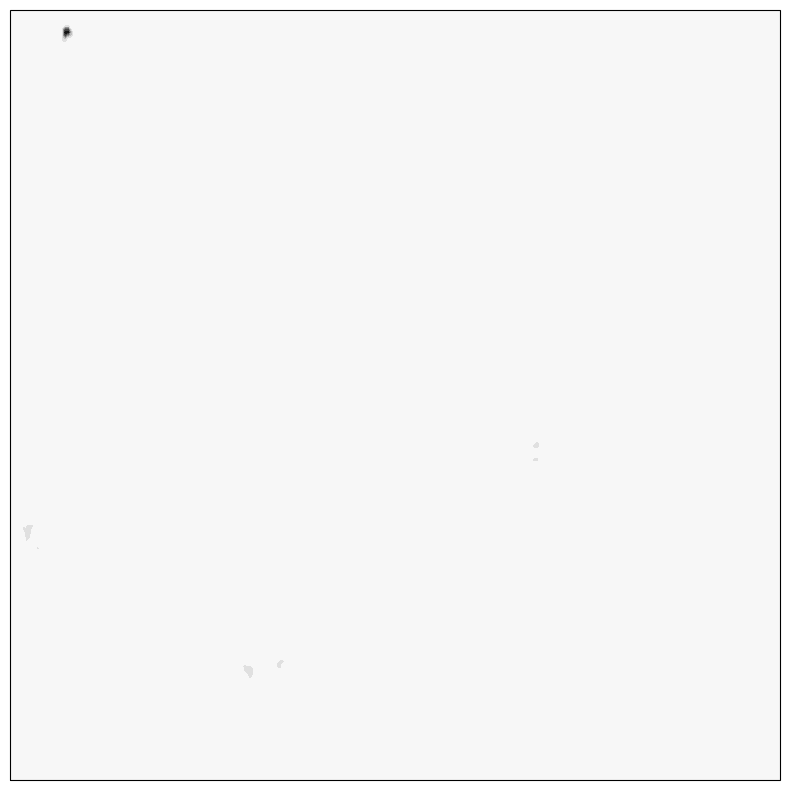

In [41]:
# imerg on the same day
from dsrnngan.data import load_imerg_raw
ds_hr = load_imerg_raw(year, month, day, 18, 
                                       imerg_data_dir='/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10), 
                        subplot_kw={'projection': ccrs.PlateCarree()})

im = axs.contourf(ds_hr.lon.values, ds_hr.lat.values , ds_hr['precipitationCal'].values, transform=ccrs.PlateCarree(),
                        cmap='Greys')

In [15]:
ds['tp'].isel(time=0).values.shape

(280, 265)